# Task 1 Simple Text-based Similarity and Retrieval

### Team E
Version 1.0.1
Date: 14/11/2023

## Import Libraries  

In [24]:
import pandas as pd
import numpy as np
import statistics as st
import math
import matplotlib.pyplot as plt

In [2]:
from ret import read_data # utility func to load data
from ret import get_id_from_info # utility func to return id by entering song's info
from ret import display_res # utility func to display results 
from ret import audio_based # modularized audio based retrieval system
from ret import text_based # modularized text based retrieval system
from ret import random_baseline # base line retrieval system that returns random results 
from ret import cos_sim # wrapper function to calculate cosine similarity
from ret import euc_sim # wrapper function to calculate euclidean similarity 
from ret import get_info_from_ids #utility func to return infro from id
from ret import get_genre_from_ids #utility func to return genres from ids
from ret import get_genre_from_query #utility func to return genre from query track
from ret import calculate_precision 
from ret import calculate_recall
from ret import average_precision
from ret import average_recall
from ret import calculate_recall_at_k
from ret import calculate_precision_at_k
from ret import plot_precision_recall_curve
from ret import genre_diversity_10

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Load Data

In [3]:
"""
Please put data files in ""./data/" before use 
"""

info = read_data("information")
tfidf = read_data("lyrics_tf-idf")
word2vec = read_data("lyrics_word2vec")
bert = read_data("lyrics_bert")
mfcc_stats = read_data("mfcc_stats")
mfcc_bow = read_data("mfcc_bow")
blf_correlation = read_data("blf_correlation")
ivec256 = read_data("ivec256")
musicnn = read_data("musicnn")
genres = read_data("genres")


In [4]:
#create genres dataset list for later use
dataset_genres = genres.values.tolist()


## Dictionary to Store Results 

In [5]:
"""
Dict to store results:
query format: res["trackTRACKNUMBER"]["REPRESENTATION"]["SIMILARITYFUNCTION"]
sample query: res["track1"]["tfidf"]["cos_sim"]

returns - list[str] 
list containing ids of a retrieved tracks 

After running, use display_res(res["trackTRACKNUMBER"]["REPRESENTATION"]["SIMILARITYFUNCTION"],info) to display results
e.g. display_res(res["track1"]["tfidf"]["cos_sim"],info)

"""
res={
    "track1": 
    {
    "base_line": None,
    "tfidf":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "word2vec":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "bert":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "blf_correlation":
    {
        "cos_sim": None,
        "euc_sim": None
    },
     "ivec256":
    {
        "cos_sim": None,
        "euc_sim": None
    },
       "musicnn":
    {
        "cos_sim": None,
        "euc_sim": None
    }
    },
    "track2": 
    {
    "base_line": None,
    "tfidf":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "word2vec":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "bert":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "blf_correlation":
    {
        "cos_sim": None,
        "euc_sim": None
    },
     "ivec256":
    {
        "cos_sim": None,
        "euc_sim": None
    },
       "musicnn":
    {
        "cos_sim": None,
        "euc_sim": None
    }
    },
    "track3":
    {
    "base_line": None,
    "tfidf":
    {
        "cos_sim": None,
        "euc_sim": None
    },
     "word2vec":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "bert":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_bow":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "mfcc_stats":
    {
        "cos_sim": None,
        "euc_sim": None
    },
    "blf_correlation":
    {
        "cos_sim": None,
        "euc_sim": None
    },
     "ivec256":
    {
        "cos_sim": None,
        "euc_sim": None
    },
       "musicnn":
    {
        "cos_sim": None,
        "euc_sim": None
    }
      
}
}

## Track 1 
"Love Me" "The 1975"

In [114]:
name = "Take The Bullets Away (feat. Lacey Sturm)"
artist = "We As Human"
id_track1 = get_id_from_info(name, artist, info)
id_track1

'01Yfj2T3YTwJ1Yfy'

In [115]:
res["track1"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track1, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [116]:
res["track1"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track1, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [117]:
res["track1"]["blf_correlation"]["cos_sim"] = audio_based(id=id_track1, repr=blf_correlation, N=10, sim_func=cos_sim)

In [118]:
res["track1"]["ivec256"]["cos_sim"] = audio_based(id=id_track1, repr=ivec256, N=10, sim_func=cos_sim)

In [119]:
res["track1"]["musicnn"]["cos_sim"] = audio_based(id=id_track1, repr=musicnn, N=10, sim_func=cos_sim)

In [120]:
display_res(res["track1"]["mfcc_stats"]["cos_sim"], info)

Name: The Heart of Everything                  Singer: Within Temptation
Name: Cactus                                   Singer: David Bowie
Name: Local Man Ruins Everything               Singer: The Wonder Years
Name: Unknown Soldier                          Singer: Breaking Benjamin
Name: Broken Promises                          Singer: Element Eighty
Name: Geraldine                                Singer: Glasvegas
Name: Call My Name                             Singer: In Flames
Name: Start a Fire                             Singer: Ryan Star
Name: Someone Who Does                         Singer: Issues
Name: My Revenge                               Singer: Bury Tomorrow


In [121]:
display_res(res["track1"]["mfcc_bow"]["cos_sim"], info)

Name: Animals                                  Singer: Ice Nine Kills
Name: Sleepwalk Capsules                       Singer: At the Drive-In
Name: Caveman                                  Singer: Angra
Name: Light In The Cave                        Singer: I See Stars
Name: You Better Pray                          Singer: The Red Jumpsuit Apparatus
Name: Drown Me Out                             Singer: Andy Black
Name: Pain                                     Singer: Of Mice & Men
Name: Thrown Into the Fire                     Singer: Trivium
Name: Act of Desperation                       Singer: Amaranthe
Name: Supersonic                               Singer: Bad Religion


In [122]:
display_res(res["track1"]["blf_correlation"]["cos_sim"], info)

Name: Detox                                    Singer: Strapping Young Lad
Name: Phoenix down                             Singer: The Unguided
Name: Demon(s)                                 Singer: Darkest Hour
Name: The Primeval Dark                        Singer: Insomnium
Name: Break the Cycle                          Singer: Motionless in White
Name: Wings of Summer                          Singer: Serj Tankian
Name: Life Underground                         Singer: The Amity Affliction
Name: Stupid Girl                              Singer: Cold
Name: Diga, parte 2                            Singer: Fresno
Name: Liar                                     Singer: Ghost Brigade


In [123]:
display_res(res["track1"]["ivec256"]["cos_sim"], info)

Name: What Have We Become                      Singer: Daughtry
Name: They Perched on Their Stilts, Pointing and Daring Me to Break Custom Singer: Saosin
Name: Memories                                 Singer: Leonard Cohen
Name: Declaration                              Singer: Trivium
Name: Sad but True                             Singer: Metallica
Name: Mistakes                                 Singer: John Frusciante
Name: Infallible                               Singer: Pearl Jam
Name: Holier Than Thou                         Singer: Metallica
Name: End Of The World                         Singer: Dead By Sunrise
Name: This Island Earth                        Singer: Misfits


In [124]:
display_res(res["track1"]["musicnn"]["cos_sim"], info)

Name: Cynics & Critics                         Singer: Icon for Hire
Name: Leave Everything Behind                  Singer: Amaranthe
Name: Lionheart                                Singer: Blind Guardian
Name: Higher                                   Singer: Edenbridge
Name: Leather Rebel (Live)                     Singer: Judas Priest
Name: The Moment                               Singer: Conception
Name: Rising Up                                Singer: Young Guns
Name: Trashed and Scattered                    Singer: Avenged Sevenfold
Name: Start Something                          Singer: Lostprophets
Name: The Uninvited                            Singer: Alter Bridge


Evaluation

In [125]:
#get query genre
query_genre1 = get_genre_from_query(id_track1, genres)
query_genre1

[('01Yfj2T3YTwJ1Yfy', "['rock', 'christian rock']")]

In [126]:
#retrieve 100 results (audio based) because k should be varied in the interval [1,100]
q1_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track1, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q1_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track1, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q1_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track1, repr=ivec256, N=100, sim_func=cos_sim), genres)
q1_genres_musicnn = get_genre_from_ids(audio_based(id=id_track1, repr=musicnn, N=100, sim_func=cos_sim), genres)
#retrieve 100 text based results because k should be varied in the interval [1,100]
q1_genres_tfidf = get_genre_from_ids(text_based(id=id_track1, repr=tfidf, N=100, sim_func=cos_sim), genres)
q1_genres_word2vec = get_genre_from_ids(text_based(id=id_track1, repr=word2vec, N=100, sim_func=cos_sim),genres)
q1_genres_bert =  get_genre_from_ids(text_based(id=id_track1, repr=bert, N=100, sim_func=cos_sim),genres)
q1_genres_random = get_genre_from_ids(random_baseline(id=id_track1, info=info, N=100),genres)


# Precision & Recall

In [19]:
#query track 1 precision (k=10) for all 8 Retrieval Systems
q1_precision_mfcc_stats = calculate_precision_at_k(query_genre1,q1_genres_mfcc_stats,10)
q1_precision_blf_correlation = calculate_precision_at_k(query_genre1,q1_genres_blf_correlation,10)
q1_precision_ivec256  = calculate_precision_at_k(query_genre1,q1_genres_ivec256,10)
q1_precision_musicnn = calculate_precision_at_k(query_genre1,q1_genres_musicnn,10)

q1_precision_tfidf = calculate_precision_at_k(query_genre1,q1_genres_tfidf,10)
q1_precision_word2vec = calculate_precision_at_k(query_genre1,q1_genres_word2vec,10)
q1_precision_bert = calculate_precision_at_k(query_genre1,q1_genres_bert,10)
q1_precision_random = calculate_precision_at_k(query_genre1,q1_genres_random,10)

table_format = "{:<20} {:<15}"

print(table_format.format("Retrieval System", "Precision at 10"))
print("-" * 30)

# Print the data rows
print(table_format.format("Audio MFCC Stats", q1_precision_mfcc_stats))
print(table_format.format("Audio BLF Correlation", q1_precision_blf_correlation))
print(table_format.format("Audio iVec 256", q1_precision_ivec256))
print(table_format.format("Audio Musicnn", q1_precision_musicnn))
print(table_format.format("Text TF-IDF", q1_precision_tfidf))
print(table_format.format("Text Word2Vec", q1_precision_word2vec))
print(table_format.format("Text BERT", q1_precision_bert))
print(table_format.format("Text Random", q1_precision_random))

Retrieval System     Precision at 10
------------------------------
Audio MFCC Stats     0.6            
Audio BLF Correlation 0.3            
Audio iVec 256       0.8            
Audio Musicnn        0.6            
Text TF-IDF          0.9            
Text Word2Vec        0.6            
Text BERT            0.6            
Text Random          0.5            


In [20]:
#query track 1 recall (k=10) for all 8 Retrieval Systems
q1_recall_mfcc_stats = calculate_recall_at_k(query_genre1, q1_genres_mfcc_stats,dataset_genres,10)
q1_recall_blf_correlation = calculate_recall_at_k(query_genre1, q1_genres_blf_correlation,dataset_genres,10)
q1_recall_ivec256 = calculate_recall_at_k(query_genre1, q1_genres_ivec256,dataset_genres,10)
q1_recall_musicnn = calculate_recall_at_k(query_genre1, q1_genres_musicnn,dataset_genres,10)
#text based recall
q1_recall_tfidf = calculate_recall_at_k(query_genre1, q1_genres_tfidf, dataset_genres,10)
q1_recall_word2vec = calculate_recall_at_k(query_genre1, q1_genres_word2vec, dataset_genres,10)
q1_recall_bert = calculate_recall_at_k(query_genre1,  q1_genres_bert, dataset_genres,10)
q1_recall_random = calculate_recall_at_k(query_genre1, q1_genres_random,dataset_genres,10)


print("{:<20} {:<10}".format("Retrieval System", "Recall at 10"))
print("-" * 30)
print("{:<20} {:<10}".format("MFCC Stats", q1_recall_mfcc_stats))
print("{:<20} {:<10}".format("BLF Correlation", q1_recall_blf_correlation))
print("{:<20} {:<10}".format("iVec 256", q1_recall_ivec256))
print("{:<20} {:<10}".format("Musicnn", q1_recall_musicnn))
print("{:<20} {:<10}".format("TF-IDF", q1_recall_tfidf))
print("{:<20} {:<10}".format("Word2Vec", q1_recall_word2vec))
print("{:<20} {:<10}".format("BERT", q1_recall_bert))
print("{:<20} {:<10}".format("Random", q1_recall_random))

Retrieval System     Recall at 10
------------------------------
MFCC Stats           0.0012026458208057728
BLF Correlation      0.0006013229104028864
iVec 256             0.0016035277610743637
Musicnn              0.0012026458208057728
TF-IDF               0.0018039687312086591
Word2Vec             0.0012026458208057728
BERT                 0.0012026458208057728
Random               0.0010022048506714773


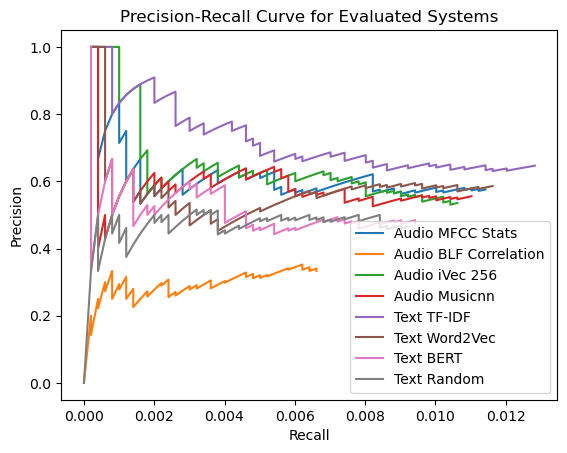

In [21]:
#plot precision recall curve for query track1 for all evaluated systems

system_data1 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre1, "retrieved_genres": q1_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre1, "retrieved_genres": q1_genres_blf_correlation, "dataset_genres": dataset_genres},
    "audio ivec_256": {"system_name": "Audio iVec 256","query_genre": query_genre1, "retrieved_genres": q1_genres_ivec256, "dataset_genres": dataset_genres},
    "audio muiscnn": {"system_name": "Audio Musicnn","query_genre": query_genre1, "retrieved_genres": q1_genres_musicnn, "dataset_genres": dataset_genres},
    "text tf-idf": {"system_name": "Text TF-IDF","query_genre": query_genre1, "retrieved_genres": q1_genres_tfidf, "dataset_genres": dataset_genres},
    "text word2vec": {"system_name": "Text Word2Vec","query_genre": query_genre1, "retrieved_genres": q1_genres_word2vec, "dataset_genres": dataset_genres},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre1, "retrieved_genres": q1_genres_bert, "dataset_genres": dataset_genres},
    "text random": {"system_name": "Text Random","query_genre": query_genre1, "retrieved_genres": q1_genres_random, "dataset_genres": dataset_genres},
}

plot_precision_recall_curve(system_data1)


In [127]:
def get_genre(id,genres_df):
  # print(genres_df[genres_df['id'] == id ]['id'].values[0],'--->',id)
  return set(genres_df[genres_df['id'] == id ]['genre'].values[0].replace("[", "").replace("]", "").replace("'", "").split(', '))


In [128]:
# retriving all the unique genres in the whole datset
all_genres = list(set([item for id in genres['id'] for item in get_genre(id, genres)]))

print('nbr of genres:', len(all_genres))
print('all genres:', all_genres)

# retrive the genres of the retrived tracks/songs
genres_retrieved = [get_genre(id, genres) for id in retrieve_tracks]
print('retrived genres:', genres_retrieved)

nbr of genres: 1112
all genres: ['indie soul', 'dream trance', 'hard rock', 'boogie woogie', 'acid house', 'deep chill', 'glitch', 'alternative emo', 'hard trance', 'polish punk', 'music hall', 'harp', 'indie pop rock', 'psychedelic folk', 'straight edge', 'ranchera', 'gypsy punk', 'southern soul', 'candy pop', 'gothic metal', 'metal gotico', 'modern funk', 'powerviolence', 'circus', 'tribal house', 'ethereal wave', 'minimalism', 'operatic pop', 'goa trance', 'dutch metal', 'psychedelic punk', 'disco', 'goregrind', 'latin', 'neo psychedelic', 'rumba', 'contemporary country', 'sleaze rock', 'post rock', 'electro house', 'glass', 'indie punk', 'bolero', 'vocal trance', 'greek metal', 'brazilian indie', 'funk rock', 'edm', 'chilean indie', 'hardcore techno', 'opera metal', 'opera', 'ambient house', 'dub', 'italo house', 'spanish punk', 'ghettotech', 'vocal jazz', 'prog metal', 'folk', 'epic doom', 'liquid funk', 'symphonic rock', 'screamocore', 'swedish black metal', 'cyber metal', 'bible

In [132]:
#diversity function provided by Ali
def diversity(genres_retrieved, all_genres, N):
    zeros_vec = np.zeros(len(all_genres))
    
    for g in genres_retrieved:
        leng_g = len(g)
        
        for g_i in g:
            position = all_genres.index(g_i)
            g_i_contribution = 1 / leng_g
            zeros_vec[position] += g_i_contribution

    result_vec = zeros_vec / N
    
    # Shannon's Entropy Calculation:
    diversity_value = 0
    
    for item in result_vec:
        if item != 0:
            diversity_value += item * math.log(item, 2)
    
    return -diversity_value


diversity_10 = diversity(genres_retrieved, all_genres, N)
print('Genre diversity@10:', diversity_10)


Genre diversity@10: 4.512733485102955


In [133]:
retrieve_tracks = audio_based(id=id_track1, repr=mfcc_stats, N=10, sim_func=cos_sim)
new_genres_retrieved = [get_genre(id, genres) for id in retrieve_tracks]
new_diversity_10 = diversity(new_genres_retrieved,all_genres,N=10)
print('Genre diversity@10: ',new_diversity_10)

Genre diversity@10:  5.10814426124961


In [136]:
#diversity function provided by Sara
import math

def genre_diversity_10(retrieved_result, dataset_genres):
    # Get unique genres in the dataset
    all_genres = set()
    for _, genres_str in dataset_genres:
        all_genres.update(eval(genres_str))

    # Initialize genre distribution dictionary with zeros
    genre_distribution = {genre: 0.0 for genre in all_genres}

    # Update genre distribution based on the retrieved tracks
    total_tracks = len(retrieved_result)
    for _, retrieved_genres_str in retrieved_result:
        retrieved_genres = set(eval(retrieved_genres_str))
        for genre in retrieved_genres:
            genre_distribution[genre] += 1.0 / total_tracks if total_tracks > 0 else 0.0

    # Calculate normalized distribution
    normalized_distribution = {genre: count / total_tracks for genre, count in genre_distribution.items()}

    # Calculate Shannon's entropy for genre diversity@10
    entropy = -sum(p * math.log2(p) for p in normalized_distribution.values() if p > 0)

    return entropy


q1_genres_mfcc_stats10 = get_genre_from_ids(audio_based(id=id_track1, repr=mfcc_stats, N=10, sim_func=cos_sim), genres)
genre_diversity_10(q1_genres_mfcc_stats10, dataset_genres)


5.309847726594688

In [110]:
import numpy as np
import math

def calculate_genre_diversity_at_10(genres_retrieved, all_genres):
    N = len(all_genres)
    total_tracks = len(genres_retrieved)
    
    genre_distribution_sum = np.zeros(N)
    
    for track_genres in genres_retrieved:
        num_genres = len(track_genres)
        contribution = 1 / num_genres if num_genres > 0 else 0
        
        for genre in track_genres:
            genre_index = all_genres.index(genre)
            genre_distribution_sum[genre_index] += contribution
    
    # Normalize the distribution
    normalized_distribution = genre_distribution_sum / total_tracks
    
    # Calculate Shannon's entropy
    entropy = -np.sum(normalized_distribution * np.log2(normalized_distribution, where=(normalized_distribution != 0)))
    
    return entropy

def calculate_average_genre_diversity_at_10(all_queries_genres_retrieved, all_genres):
    total_queries = len(all_queries_genres_retrieved)
    
    diversity_sum = 0
    for query_genres_retrieved in all_queries_genres_retrieved:
        diversity_sum += calculate_genre_diversity_at_10(query_genres_retrieved, all_genres)
    
    average_diversity = diversity_sum / total_queries
    return average_diversity

# Example usage
all_genres = ['ambient', 'blues', 'country']

# Example query tracks with retrieved genres
query1_genres_retrieved = [['country'], ['country', 'blues'], ['country']]
query2_genres_retrieved = [['ambient', 'blues'], ['blues'], ['ambient', 'country']]

# Calculate genre diversity@10 for each query
diversity_query1 = calculate_genre_diversity_at_10(query1_genres_retrieved, all_genres)
diversity_query2 = calculate_genre_diversity_at_10(query2_genres_retrieved, all_genres)

print('Genre Diversity@10 for Query 1:', diversity_query1)
print('Genre Diversity@10 for Query 2:', diversity_query2)

# Calculate average genre diversity@10 over all queries
all_queries_genres_retrieved = [query1_genres_retrieved, query2_genres_retrieved]
average_diversity = calculate_average_genre_diversity_at_10(all_queries_genres_retrieved, all_genres)

print('Average Genre Diversity@10:', average_diversity)


Genre Diversity@10 for Query 1: 0.6500224216483541
Genre Diversity@10 for Query 2: 1.4591479170272448
Average Genre Diversity@10: 1.0545851693377994


In [134]:
calculate_genre_diversity_at_10(new_genres_retrieved, all_genres)

5.108144261249609

## Track 2 

"One" "U2"

In [125]:
name = 'One'
artist = 'U2'
id_track2 = get_id_from_info(name, artist, info)

In [126]:
res["track2"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track2, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [127]:
res["track2"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track2, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [128]:
res["track2"]["blf_correlation"]["cos_sim"] = audio_based(id=id_track2, repr=blf_correlation, N=10, sim_func=cos_sim)

In [129]:
res["track2"]["ivec256"]["cos_sim"] = audio_based(id=id_track2, repr=ivec256, N=10, sim_func=cos_sim)

In [141]:
res["track2"]["musicnn"]["cos_sim"] = audio_based(id=id_track2, repr=musicnn, N=10, sim_func=cos_sim)

In [142]:
display_res(res["track2"]["mfcc_bow"]["cos_sim"], info)

Name: La Raja De Tu Falda                      Singer: Estopa
Name: Doubt                                    Singer: Hippo Campus
Name: Isla Bella                               Singer: Ricky Martin
Name: Lariat                                   Singer: Stephen Malkmus & The Jicks
Name: Ridin' in My Car                         Singer: She & Him
Name: Love Long Distance                       Singer: Gossip
Name: Boum Boum Boum                           Singer: Mika
Name: Within You Without You                   Singer: Patti Smith
Name: Each Time                                Singer: Tamino
Name: Bonnie (Rhythm & Melody)                 Singer: Turnover


In [143]:
display_res(res["track2"]["mfcc_stats"]["cos_sim"], info)

Name: Garotos II - O Outro Lado                Singer: Leoni
Name: Lariat                                   Singer: Stephen Malkmus & The Jicks
Name: Ran Before the Storm                     Singer: Roo Panes
Name: Bendable Poseable                        Singer: Hot Chip
Name: So Long, So Long                         Singer: Dashboard Confessional
Name: Pieprz i sól                             Singer: Kasia Kowalska
Name: Sing Another Song, Boys                  Singer: Leonard Cohen
Name: Sleep Paralysis                          Singer: Bad Suns
Name: All Things All At Once                   Singer: Tired Pony
Name: Curiosity                                Singer: Turnover


In [144]:
display_res(res["track2"]["blf_correlation"]["cos_sim"], info)

Name: Simple Twist of Fate (Live)              Singer: Bob Dylan
Name: Someone Singing Along                    Singer: James Blunt
Name: Cambio Dolor                             Singer: Natalia Oreiro
Name: Carve Away the Stone                     Singer: Rush
Name: One                                      Singer: Mary J. Blige
Name: Air Hostess                              Singer: Busted
Name: The Man Who Sold the World               Singer: David Bowie
Name: Ain't No Mountain High Enough            Singer: Marvin Gaye & Tammi Terrell
Name: Monsoon                                  Singer: Robbie Williams
Name: Man In The Middle                        Singer: Bee Gees


In [145]:
display_res(res["track2"]["ivec256"]["cos_sim"], info)

Name: Oh Comely                                Singer: Neutral Milk Hotel
Name: Gone                                     Singer: Jack Johnson
Name: No Ordinary Love                         Singer: Sade
Name: Philadelphia                             Singer: Parachute
Name: Sick, Sick, Sick                         Singer: Bayside
Name: Darkness                                 Singer: Darren Hayes
Name: Pro Anti Anti                            Singer: Liars
Name: Shallow Tears                            Singer: Light Asylum
Name: Northern Downpour                        Singer: Panic! at the Disco
Name: (Our Love) Don't Throw It All Away       Singer: Andy Gibb


In [146]:
display_res(res["track2"]["musicnn"]["cos_sim"], info)

Name: Domenica Domingava Num Domingo Linda Toda De Branco Singer: Jorge Ben
Name: Simple Math                              Singer: Manchester Orchestra
Name: Scene Four: Beyond This Life             Singer: Dream Theater
Name: Dr. John                                 Singer: Mika
Name: Angels                                   Singer: Robbie Williams
Name: She Wants To Know                        Singer: Half Moon Run
Name: Morning Star                             Singer: Cass McCombs
Name: Liza Forever Minnelli                    Singer: The Mountain Goats
Name: Skyline Pigeon                           Singer: Elton John
Name: Il cielo in una stanza                   Singer: Mike Patton


Evaluation

In [171]:
query_genre2 = get_genre_from_query(id_track2, genres)
query_genre2

[('Ddg8zi2tOooa4HH1',
  "['rock', 'classic rock', 'pop', 'alternative rock', 'soft rock', 'pop rock', 'easy listening', 'irish rock']")]

In [153]:
#retrieve 100 results (audio based) because k should be varied in the interval [1,100]
q2_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track2, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q2_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track2, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q2_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track2, repr=ivec256, N=100, sim_func=cos_sim), genres)
q2_genres_musicnn = get_genre_from_ids(audio_based(id=id_track2, repr=musicnn, N=100, sim_func=cos_sim), genres)
#retrieve 100 results (text based) because k should be varied in the interval [1,100]
q2_genres_tfidf = get_genre_from_ids(text_based(id=id_track2, repr=tfidf, N=100, sim_func=cos_sim), genres)
q2_genres_word2vec = get_genre_from_ids(text_based(id=id_track2, repr=word2vec, N=100, sim_func=cos_sim),genres)
q2_genres_bert =  get_genre_from_ids(text_based(id=id_track2, repr=bert, N=100, sim_func=cos_sim),genres)
q2_genres_random = get_genre_from_ids(random_baseline(id=id_track2, info=info, N=100),genres)

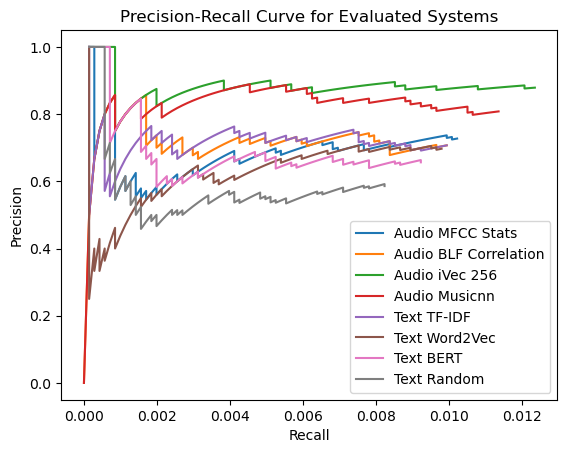

In [154]:
#plot precision recall curve for query track2 for all evaluated systems

system_data2 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre2, "retrieved_genres": q2_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre2, "retrieved_genres": q2_genres_blf_correlation, "dataset_genres": dataset_genres},
    "audio ivec256": {"system_name": "Audio iVec 256","query_genre": query_genre2, "retrieved_genres": q2_genres_ivec256, "dataset_genres": dataset_genres},
    "audio musicnn": {"system_name": "Audio Musicnn","query_genre": query_genre2, "retrieved_genres": q2_genres_musicnn, "dataset_genres": dataset_genres},
    "text tfidf": {"system_name": "Text TF-IDF","query_genre": query_genre2, "retrieved_genres": q2_genres_tfidf, "dataset_genres": dataset_genres},
    "text word2vec": {"system_name": "Text Word2Vec","query_genre": query_genre2, "retrieved_genres": q2_genres_word2vec, "dataset_genres": dataset_genres},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre2, "retrieved_genres": q2_genres_bert, "dataset_genres": dataset_genres},
    "text random": {"system_name": "Text Random","query_genre": query_genre2, "retrieved_genres": q2_genres_random, "dataset_genres": dataset_genres},
}

plot_precision_recall_curve(system_data2)

## Track 3

"Every Christmas" "Kelly Clarkson"

In [155]:
name = 'Every Christmas'
artist = 'Kelly Clarkson'
id_track3 = get_id_from_info(name, artist, info)

In [156]:
res["track3"]["mfcc_bow"]["cos_sim"] = audio_based(id=id_track3, repr=mfcc_bow, N=10, sim_func=cos_sim)

In [157]:
res["track3"]["mfcc_stats"]["cos_sim"] = audio_based(id=id_track3, repr=mfcc_stats, N=10, sim_func=cos_sim)

In [158]:
res["track3"]["blf_correlation"]["cos_sim"] = audio_based(id=id_track3, repr=blf_correlation, N=10, sim_func=cos_sim)

In [159]:
res["track3"]["ivec256"]["cos_sim"] = audio_based(id=id_track3, repr=ivec256, N=10, sim_func=cos_sim)

In [160]:
res["track3"]["musicnn"]["cos_sim"] = audio_based(id=id_track3, repr=musicnn, N=10, sim_func=cos_sim)

In [161]:
display_res(res["track3"]["mfcc_bow"]["cos_sim"], info)

Name: Bala Com Bala                            Singer: Elis Regina
Name: One                                      Singer: Alanis Morissette
Name: Caramba! ... Galileu Da Galiléia         Singer: Jorge Ben
Name: Bright                                   Singer: Echosmith
Name: Flerte revival                           Singer: Letrux
Name: La Primavera Trompetera                  Singer: Los Delinqüentes
Name: Like a Stone                             Singer: Chris Cornell
Name: Vem Morena                               Singer: Gilberto Gil
Name: A Moment Like This                       Singer: Kelly Clarkson
Name: Riviera Life                             Singer: Caro Emerald


In [162]:
display_res(res["track3"]["mfcc_stats"]["cos_sim"], info)

Name: Raindrops Keep Fallin' On My Head        Singer: B.J. Thomas
Name: Pure Narcotic                            Singer: Porcupine Tree
Name: Best Love                                Singer: Rose Royce
Name: Raconte-moi une histoire                 Singer: M83
Name: Mighty Wings                             Singer: Cheap Trick
Name: Love Is A Hurricane                      Singer: Boyzone
Name: Resistance - Live At Rome Olympic Stadium Singer: Muse
Name: New World Man                            Singer: Rush
Name: Clouds                                   Singer: Chaka Khan
Name: Dance With Me                            Singer: Alphaville


In [163]:
display_res(res["track3"]["blf_correlation"]["cos_sim"], info)

Name: Hold On                                  Singer: Yes
Name: Door to Door Cannibals                   Singer: Chevelle
Name: Pretty Girls                             Singer: Britney Spears
Name: Lights Turned On                         Singer: Childish Gambino
Name: 19-2000 (Soulchild remix)                Singer: Gorillaz
Name: Counting Down the Hours                  Singer: Ted Leo and the Pharmacists
Name: So Much I                                Singer: Red Hot Chili Peppers
Name: Dick Lips                                Singer: blink-182
Name: Jein                                     Singer: Fettes Brot
Name: Undivided                                Singer: Bon Jovi


In [164]:
display_res(res["track3"]["ivec256"]["cos_sim"], info)

Name: Swords to Rust - Hearts to Dust          Singer: Rome
Name: Gypsy Woman                              Singer: Tim Buckley
Name: I Am Bored                               Singer: The Microphones
Name: Drunkship of Lanterns                    Singer: The Mars Volta
Name: So Contagious                            Singer: Acceptance
Name: Dark in My Imagination                   Singer: of Verona
Name: Riviera Life                             Singer: Caro Emerald
Name: Ativan                                   Singer: Atlas Sound
Name: Baby Bird                                Singer: Whores.
Name: Ten Thousand Ways To Die                 Singer: Obituary


In [165]:
display_res(res["track3"]["musicnn"]["cos_sim"], info)

Name: Submarine                                Singer: Björk
Name: On Battleship Hill                       Singer: PJ Harvey
Name: West Coast                               Singer: Coconut Records
Name: Beauty and the Beast                     Singer: Céline Dion
Name: In Real Life                             Singer: Molly Nilsson
Name: This Is It                               Singer: Michael Jackson
Name: Love Will Lead You Back                  Singer: Taylor Dayne
Name: Broken Wings                             Singer: Alter Bridge
Name: I'll Never Break Your Heart              Singer: Backstreet Boys
Name: Can't You Just Adore Her?                Singer: Mandy Moore


Evaluation

In [166]:
query_genre3 = get_genre_from_query(id_track3, genres)
query_genre3

[('9ScGeeaW8XcxgePd', "['pop']")]

In [167]:
#retrieve 100 results (audio based) because k should be varied in the interval [1,100]
q3_genres_mfcc_stats = get_genre_from_ids(audio_based(id=id_track3, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q3_genres_blf_correlation = get_genre_from_ids(audio_based(id=id_track3, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q3_genres_ivec256 = get_genre_from_ids(audio_based(id=id_track3, repr=ivec256, N=100, sim_func=cos_sim), genres)
q3_genres_musicnn = get_genre_from_ids(audio_based(id=id_track3, repr=musicnn, N=100, sim_func=cos_sim), genres)
#retrieve 100 results (text based) because k should be varied in the interval [1,100]
q3_genres_tfidf = get_genre_from_ids(text_based(id=id_track3, repr=tfidf, N=100, sim_func=cos_sim), genres)
q3_genres_word2vec = get_genre_from_ids(text_based(id=id_track3, repr=word2vec, N=100, sim_func=cos_sim),genres)
q3_genres_bert =  get_genre_from_ids(text_based(id=id_track3, repr=bert, N=100, sim_func=cos_sim),genres)
q3_genres_random = get_genre_from_ids(random_baseline(id=id_track3, info=info, N=100),genres)

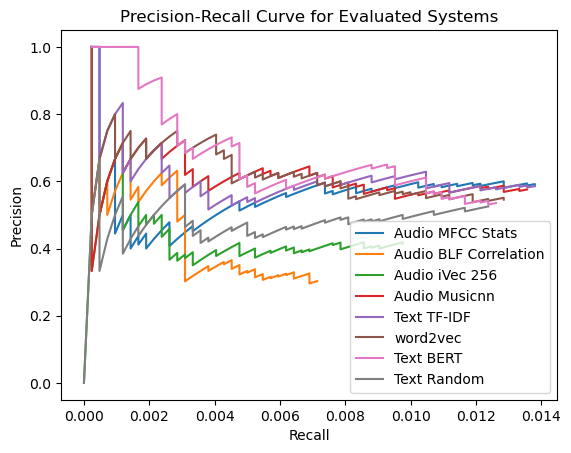

In [169]:
#plot precision recall curve for query track3 for all evaluated systems

system_data3 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre3, "retrieved_genres": q3_genres_mfcc_stats, "dataset_genres": dataset_genres},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre3, "retrieved_genres": q3_genres_blf_correlation, "dataset_genres": dataset_genres},
    "audio ivec256": {"system_name": "Audio iVec 256","query_genre": query_genre3, "retrieved_genres": q3_genres_ivec256, "dataset_genres": dataset_genres},
    "audio muiscnn": {"system_name": "Audio Musicnn","query_genre": query_genre3, "retrieved_genres": q3_genres_musicnn, "dataset_genres": dataset_genres},
    "text tfidf": {"system_name": "Text TF-IDF","query_genre": query_genre3, "retrieved_genres": q3_genres_tfidf, "dataset_genres": dataset_genres},
    "text word2vec": {"system_name": "word2vec","query_genre": query_genre3, "retrieved_genres": q3_genres_word2vec, "dataset_genres": dataset_genres},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre3, "retrieved_genres": q3_genres_bert, "dataset_genres": dataset_genres},
    "text random": {"system_name": "Text Random","query_genre": query_genre3, "retrieved_genres": q3_genres_random, "dataset_genres": dataset_genres},
}

plot_precision_recall_curve(system_data3)


# Accuracy

In [170]:
#Average precision for all 3 Query tracks mfcc_stats, K = 10
p1 = calculate_precision_at_k(query_genre1,q1_genres_mfcc_stats,10)
p2 = calculate_precision_at_k(query_genre2,q2_genres_mfcc_stats,10)
p3 = calculate_precision_at_k(query_genre3,q3_genres_mfcc_stats,10)
average_precision(p1, p2, p3)

0.6666666666666666

In [172]:
#Average recall for all 3 Query tracks mfcc_stats, K = 10
r1 = calculate_recall_at_k(query_genre1,q1_genres_mfcc_stats, dataset_genres, 10)
r2 = calculate_recall_at_k(query_genre2,q2_genres_mfcc_stats, dataset_genres, 10)
r3 = calculate_recall_at_k(query_genre3,q3_genres_mfcc_stats, dataset_genres, 10)
average_recall(r1, r2, r3)

0.001098228504246014